Test the rate sorter code

This code is the classic method to organize your neural data according to its peak response activity per unit x-axis.

This is commonly used in the hippocampal field to reveal sequentially organized activity

In [2]:
from pynwb import NWBHDF5IO
import nwbwidgets
import os;
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

# custom code
path_added = os.path.split(os.path.split(os.getcwd())[0])[0]; os.chdir(path_added); print("Added path:",path_added)
import rootfun as rf # we can import this if our cwd is local
import nwbfun
import plotters
root = rf.dropbox_root(dropbox_folder='timspellman')

Added path: c:\Users\johnj\SpellmanLab Dropbox\timspellman\Python\John\PySpell\code


Extract data from NWB files

Note that you could also just run io.read(nwbpath) and get all of the same data. In fact, we're missing some information by not doing that here.

In [3]:
root = rf.dropbox_root(dropbox_folder='timspellman')
nwbpath = os.path.join(root,r"timspellman\Python\John\PySpell\code\Projects\Test Data\t284_SEDS2_L5.nwb")

stat, ops, F, Fneu, spks, iscell, probcell, redcell, probredcell = nwbfun.suite2p_nwb().read_nwb(fpath=nwbpath);
behdict = nwbfun.unwrap().spellmanBeh(nwbpath=nwbpath)
time_around=[10,10] # time around event marker for PETH

# this should be under a different function name
peth = plotters.seds_peth(neural_data = spks[iscell,:], fs=ops['fs'], behdata=behdict, time_around=[10,10]);

# spkdata
spkdata = spks[iscell]

trialStartTimes detected
rewardTimes detected
stimOnTimes detected
stimOffTimes detected
lickTimesL detected
lickTimesR detected
rewardTimesIdxTrials detected


Text(0.5, 1.0, 'Sorted Spks')

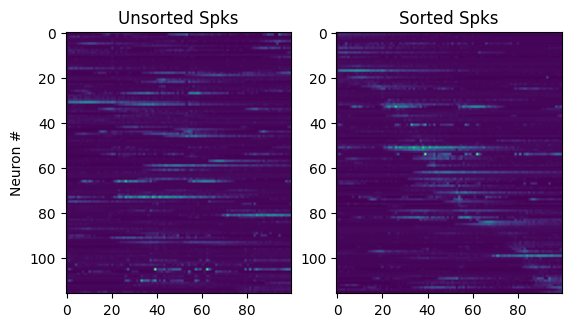

In [4]:
from plotters import sort_activity_by_xmax
from scipy import stats

fig, ax = plt.subplots(nrows=1,ncols=2)
spkz = stats.zscore(spkdata,axis=1) #zscore over time

# sort by peak activity
spkz_epoch = spkz[:,0:100]
times = np.linspace(-time_around[0],time_around[1],spkz_epoch.shape[1])

# sorted data
sorted_data_spks, sort_x_idx = sort_activity_by_xmax(neural_data=spkz_epoch)

ax[0].imshow(spkz_epoch); ax[0].set_ylabel("Neuron #"); ax[0].set_title("Unsorted Spks")
#ax[0].set_xticklabels(list(times))
ax[1].imshow(sorted_data_spks); ax[1].set_title("Sorted Spks")


Combine this with `peth`

Fig. 1 below: sorted spks surrounding reward on Context 0

Text(0.5, 1.0, 'Sorted Spks')

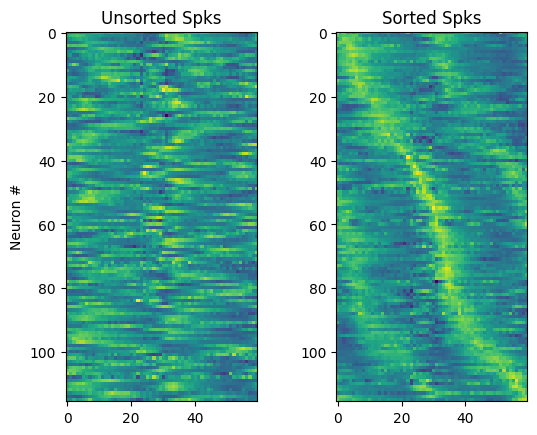

In [34]:
# take the average over trials
avg_peth = np.mean(peth['rewardTimesIdxTrialssetID_0'],axis=0)
peth_z   = stats.zscore(avg_peth,axis=1) #zscore over time

# plot components
sorted_data_spks, sort_x_idx = sort_activity_by_xmax(neural_data=peth_z)

fig, ax = plt.subplots(nrows=1,ncols=2)
ax[0].imshow(peth_z); ax[0].set_ylabel("Neuron #"); ax[0].set_title("Unsorted Spks")
ax[1].imshow(sorted_data_spks); ax[1].set_title("Sorted Spks")


Here, I show how we can sort context by another context

Text(0.5, 1.0, 'Cntx1 by Cntx0')

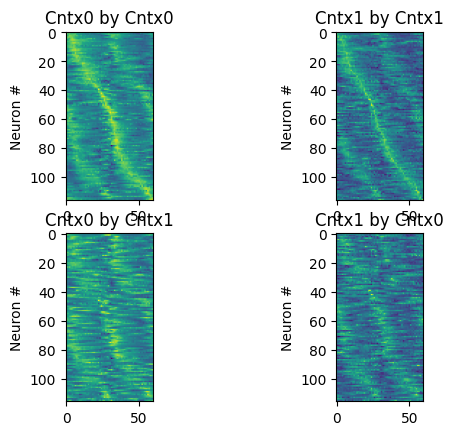

In [39]:
# take the average over trials
avg_peth_cntx0 = np.mean(peth['rewardTimesIdxTrialssetID_0'],axis=0)
avg_peth_cntx1 = np.mean(peth['rewardTimesIdxTrialssetID_1'],axis=0)

# z-scored peth surrounding contexts
peth_z_cntx0   = stats.zscore(avg_peth_cntx0,axis=1) #zscore over time
peth_z_cntx1   = stats.zscore(avg_peth_cntx1,axis=1) #zscore over time

# plot components
sorted_data_cnt0, sort_x_idx_cnt0 = sort_activity_by_xmax(neural_data=peth_z_cntx0)
sorted_data_cnt1, sort_x_idx_cnt1 = sort_activity_by_xmax(neural_data=peth_z_cntx1)

fig, ax = plt.subplots(nrows=2,ncols=2)
ax[0,0].imshow(sorted_data_cnt0); ax[0,0].set_ylabel("Neuron #"); ax[0,0].set_title("Cntx0 by Cntx0")
ax[0,1].imshow(sorted_data_cnt1); ax[0,1].set_ylabel("Neuron #"); ax[0,1].set_title("Cntx1 by Cntx1")

ax[1,0].imshow(peth_z_cntx0[sort_x_idx_cnt1]); ax[1,0].set_ylabel("Neuron #"); ax[1,0].set_title("Cntx0 by Cntx1")
ax[1,1].imshow(peth_z_cntx1[sort_x_idx_cnt0]); ax[1,1].set_ylabel("Neuron #"); ax[1,1].set_title("Cntx1 by Cntx0")

#ax[0].imshow(peth_z); ax[0].set_ylabel("Neuron #"); ax[0].set_title("Unsorted Spks")
#ax[1].imshow(sorted_data_spks); ax[1].set_title("Sorted Spks")

Or sort correct by incorrect. Here we identify stimulus offsets during correct and incorrect trials, then sort them

Text(0.5, 1.0, 'Inc by Cor')

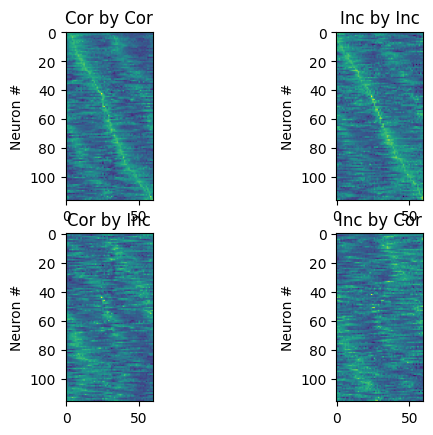

In [40]:
# take the average over trials
avg_peth_cor   = np.mean(peth['stimOffTimessetID_1_correct'],axis=0)
avg_peth_incor = np.mean(peth['stimOffTimessetID_1_incorrect'],axis=0)

# z-scored peth surrounding contexts
peth_z_cor   = stats.zscore(avg_peth_cor,axis=1) #zscore over time
peth_z_inc   = stats.zscore(avg_peth_incor,axis=1) #zscore over time

# plot components
sorted_data_cor, sort_x_idx_cor = sort_activity_by_xmax(neural_data=peth_z_cor)
sorted_data_inc, sort_x_idx_inc = sort_activity_by_xmax(neural_data=peth_z_inc)

fig, ax = plt.subplots(nrows=2,ncols=2)
ax[0,0].imshow(sorted_data_cor); ax[0,0].set_ylabel("Neuron #"); ax[0,0].set_title("Cor by Cor")
ax[0,1].imshow(sorted_data_inc); ax[0,1].set_ylabel("Neuron #"); ax[0,1].set_title("Inc by Inc")

ax[1,0].imshow(peth_z_cor[sort_x_idx_inc]); ax[1,0].set_ylabel("Neuron #"); ax[1,0].set_title("Cor by Inc")
ax[1,1].imshow(peth_z_inc[sort_x_idx_cor]); ax[1,1].set_ylabel("Neuron #"); ax[1,1].set_title("Inc by Cor")

Reward times correct vs reward times incorrect

Text(0.5, 0, 'Samples around Reward')

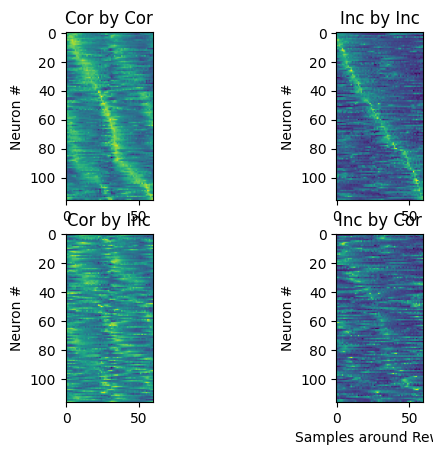

In [41]:
# take the average over trials
avg_peth_cor   = np.mean(peth['rewardTimesIdxTrialstrialCorrect'],axis=0)
avg_peth_incor = np.mean(peth['rewardTimesIdxTrialstrialIncorrect'],axis=0)

# z-scored peth surrounding contexts
peth_z_cor   = stats.zscore(avg_peth_cor,axis=1) #zscore over time
peth_z_inc   = stats.zscore(avg_peth_incor,axis=1) #zscore over time

# plot components
sorted_data_cor, sort_x_idx_cor = sort_activity_by_xmax(neural_data=peth_z_cor)
sorted_data_inc, sort_x_idx_inc = sort_activity_by_xmax(neural_data=peth_z_inc)

fig, ax = plt.subplots(nrows=2,ncols=2)
ax[0,0].imshow(sorted_data_cor); ax[0,0].set_ylabel("Neuron #"); ax[0,0].set_title("Cor by Cor")
ax[0,1].imshow(sorted_data_inc); ax[0,1].set_ylabel("Neuron #"); ax[0,1].set_title("Inc by Inc")

ax[1,0].imshow(peth_z_cor[sort_x_idx_inc]); ax[1,0].set_ylabel("Neuron #"); ax[1,0].set_title("Cor by Inc")
ax[1,1].imshow(peth_z_inc[sort_x_idx_cor]); ax[1,1].set_ylabel("Neuron #"); ax[1,1].set_title("Inc by Cor"); ax[1,1].set_xlabel("Samples around Reward")

Plot an example unit over time

In [27]:
from scipy.stats import sem

# take the average over trials
avg_peth_cor   = np.mean(peth['rewardTimesIdxTrialstrialCorrect'],axis=0)
avg_peth_incor = np.mean(peth['rewardTimesIdxTrialstrialIncorrect'],axis=0)

sem_peth_cor = sem(peth['rewardTimesIdxTrialstrialCorrect'],axis=0)
sem_peth_incor = sem(peth['rewardTimesIdxTrialstrialCorrect'],axis=0)

# time around
times = np.linspace(-time_around[0],time_around[1],avg_peth_cor.shape[1])

Text(0.5, 0, 'Time around reward from correct trials')

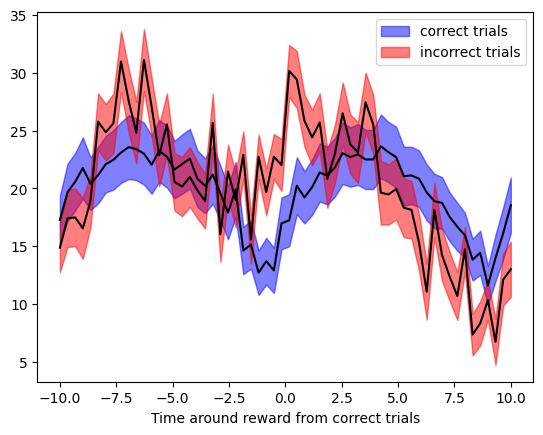

In [37]:
# Plot the line
comp = 0
plt.plot(times, avg_peth_cor[0,:], 'k-')
plt.plot(times, avg_peth_incor[0,:], 'k-')

plt.fill_between(times, avg_peth_cor[0,:] - sem_peth_cor[0,:], avg_peth_cor[0,:] + sem_peth_cor[0,:], color='b', alpha = 0.5, label='correct trials')
plt.fill_between(times, avg_peth_incor[0,:] - sem_peth_incor[0,:], avg_peth_incor[0,:] + sem_peth_incor[0,:], color='r', alpha = 0.5, label='incorrect trials')
plt.legend()

plt.xlabel("Time around reward from correct trials")